# Unified ML Security & Privacy Lab

Runs a research-style mini-study across **utility, robustness, and privacy** on FashionMNIST.
Outputs are saved into `results/` (plots + `summary.json`).


In [8]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/ml_security_privacy_project

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/ml_security_privacy_project


In [9]:
!pip -q install -r requirements.txt

In [10]:
!python -m src.main --quick

Saved results to: /content/drive/MyDrive/ml_security_privacy_project/results
standard test acc: 0.8486666666666667 mia auc: 0.5150976666666667
pgd-train test acc: 0.7836666666666666 mia auc: 0.49995000000000006
dp-train test acc: 0.762 mia auc: 0.5100881111111111
cvae recon gap (OUT-IN): 5.825795233249664e-05
gmm test acc: 0.786


In [11]:
import json
from pprint import pprint
with open('results/summary.json','r') as f:
    summary = json.load(f)
pprint({
    'device': summary['device'],
    'standard_test_acc': summary['standard']['test']['acc'],
    'pgd_train_test_acc': summary['pgd_trained']['test']['acc'],
    'dp_train_test_acc': summary['dp_trained']['test']['acc'],
    'standard_mia_auc': summary['standard']['mia']['mia_learned_auc'],
    'pgd_train_mia_auc': summary['pgd_trained']['mia']['mia_learned_auc'],
    'dp_train_mia_auc': summary['dp_trained']['mia']['mia_learned_auc'],
    'cvae_recon_gap_out_minus_in': summary['cvae']['recon_gap_out_minus_in'],
    'gmm_test_acc': summary['gmm']['gmm_test_acc'],
})

{'cvae_recon_gap_out_minus_in': 5.825795233249664e-05,
 'device': 'cuda',
 'dp_train_mia_auc': 0.5100881111111111,
 'dp_train_test_acc': 0.762,
 'gmm_test_acc': 0.786,
 'pgd_train_mia_auc': 0.49995000000000006,
 'pgd_train_test_acc': 0.7836666666666666,
 'standard_mia_auc': 0.5150976666666667,
 'standard_test_acc': 0.8486666666666667}


## View plots
- `results/test_acc_vs_epoch.png`
- `results/robust_fgsm.png`, `results/robust_pgd.png`
- `results/mia_roc.png`
- `results/cvae_samples.png`, `results/cvae_recon_in_out.png`


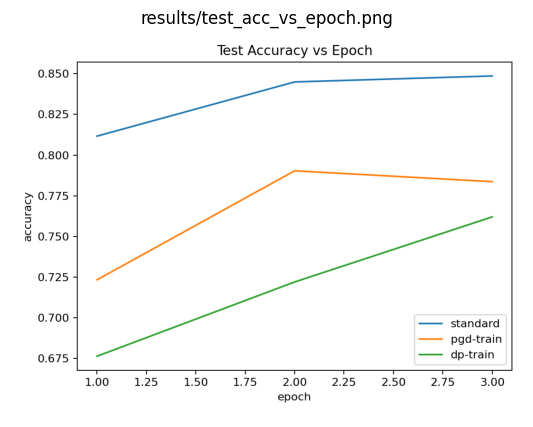

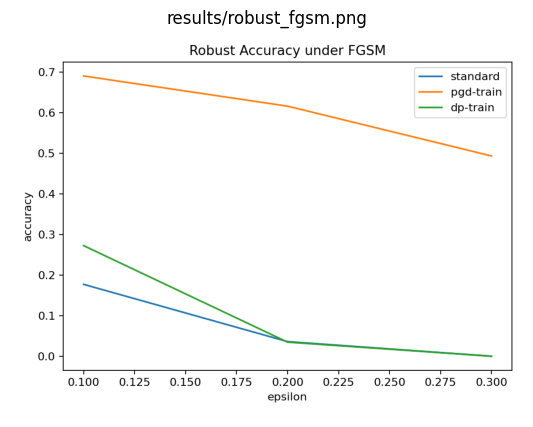

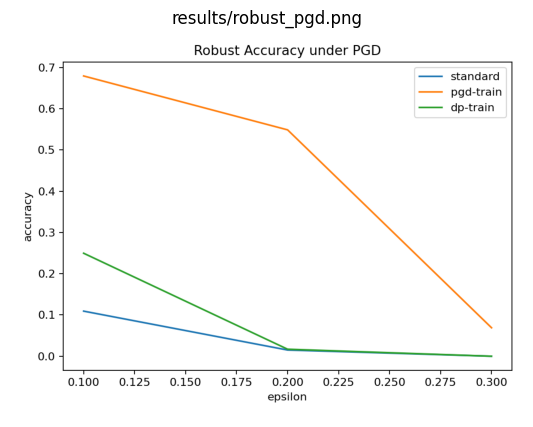

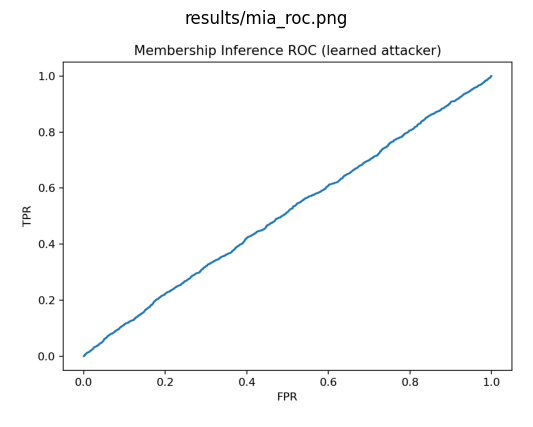

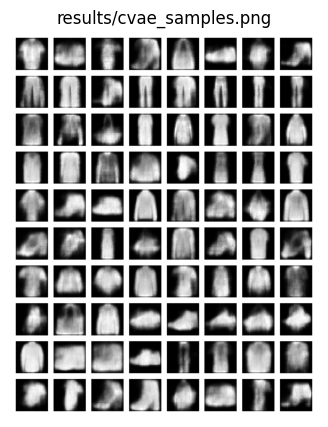

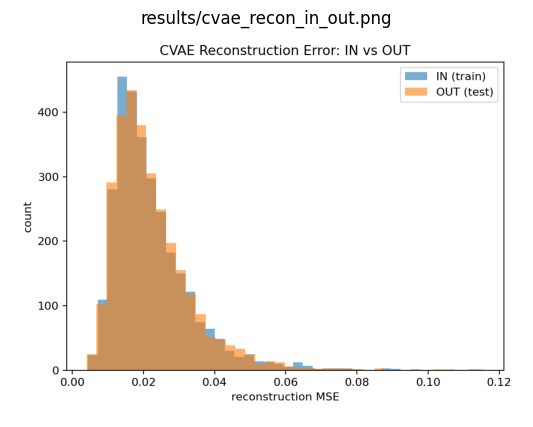

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import os
paths = [
    'results/test_acc_vs_epoch.png',
    'results/robust_fgsm.png',
    'results/robust_pgd.png',
    'results/mia_roc.png',
    'results/cvae_samples.png',
    'results/cvae_recon_in_out.png'
]
for p in paths:
    if os.path.exists(p):
        img = Image.open(p)
        plt.figure(figsize=(7,5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(p)
        plt.show()